# <span style="color:green">Geolocalisation -  Notebook 2.1 Modelling genomic data - Geographical prediction</span>

## <span style="color:green">0. Load packages and data stored as pkl</span>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, average_precision_score, f1_score

# If should be df_c2_filtPos80filtSamp70 but for abbreviation we will made it df_train_c
df = pd.read_pickle("../data/df_c2_filtPos80filtSamp70.pkl.gz", compression="infer") # Import object with pickle

geo = pd.read_csv("../data/Sample_localisation_extended.csv", decimal=',') # Data with geolocalisation

In [2]:
print(df.shape)
print(geo.shape)

(346, 288274)
(828, 6)


## <span style="color:green">1. Formatting the data</span>

### <span style="color:green">1.1 Replace NaN by mean of columns and rows</span>

In [4]:
mean_val=df.iloc[:,].mean().mean()
df = df.replace(np.nan, mean_val)

## <span style="color:green">2. Modelling </span>
#### <span style="color:green">Define X and y variables</span>

In [12]:
# Set seed
import random
random.seed(1)

names = df.axes[0].tolist() # Names of samples
geo = geo.reset_index().set_index('ExtractID').loc[names].reset_index().set_index('index') # Extract geo rows that are in names

y = geo.iloc[:,2:4] # For Longitude and Latitude
X = df.reset_index(drop = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# To make sure that dimensions are ok
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(276, 288274)
(70, 288274)
276
70


### <span style="color:green">2.1 Linear Regression</span>

In [55]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_error = mean_squared_error(y_test, y_pred, squared=False)

print("The mean error in prediction using Linear Regression is ", mean_error)

The mean error in prediction using Linear Regression is  1.8884715454343617


In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("The r2-score of our model is ", r2)


The r2-score of our model is  0.9577323155081918


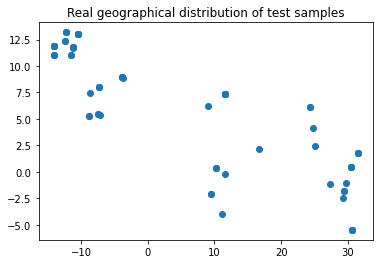

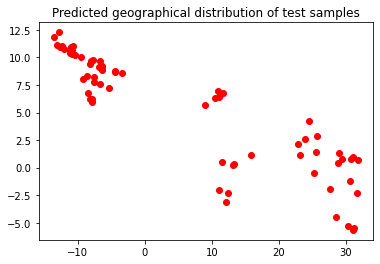

In [53]:
import matplotlib.pyplot as plt
plt.scatter(x=y_test['Longitude'], y=y_test['Latitude'])
plt.title("Real geographical distribution of test samples")
plt.show()

plt.scatter(x=np.array(y_pred)[:, 0], y=np.array(y_pred)[:, 1], c='red')
plt.title("Predicted geographical distribution of test samples")
plt.show()

<span style="color:green">Linear Regression provides relatively satisfactory results, showing a capacity of predicting the overall area a sample was taken from. However, this is to be expected, since we have already seen that we are able to predict the name of the region of origin of a sample. It would be interesting to measure how accurately a sample gets placed inside a region relative to other samples from the same region.</span>

In [58]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor()
regr.fit(X_train, y_train)

#regr.predict(X_test)

KeyboardInterrupt: 

## <span style="color:green">3. Conclusion </span>
<span style="color:green">Once clean data is available, it is possible use a variety of classifiers for predicting the chimpanzee's subspecies from DNA. Out of the four classifiers tested, random forest, nearest neighbors and support vector machine are the ones which perform best, as all of them yield an accuracy and f1-scores of 1. </span>